## Importing Libraries

In [39]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
# Reading the Train Dataset
url1 = 'https://raw.githubusercontent.com/dbohara88/ml-mini-project/main/train.csv?token=GHSAT0AAAAAABZ2FNC2MGRTD7OJ7XEBXU74Y3DQY7A'
train_data = pd.read_csv(url1)
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [41]:
# Reading the Test Dataset
url2 = 'https://raw.githubusercontent.com/dbohara88/ml-mini-project/main/test.csv?token=GHSAT0AAAAAABZ2FNC2S3IB4E6GAQVQZNIWY3DQ2ZQ'
test_data = pd.read_csv(url2)
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [42]:
# Shape of Train and Test DataFrame
print(train_data.shape)
print(test_data.shape)

(891, 12)
(418, 11)


In [43]:
# Checking Train DataFrame for Missing Values
train_data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [44]:
# Checking Test DataFrame for Missing Values
test_data.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [45]:
# Information of the Train DataFrame
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [46]:
# Statistical Information of the Train DataFrame
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Data Visualization

### Sex


In [47]:
# Percentage of Women in the Train DataFrame who survived
women = train_data.loc[train_data.Sex == 'female']["Survived"]
rate_women = sum(women)/len(women)

print("% of women who survived:", rate_women * 100)

% of women who survived: 74.20382165605095


In [48]:
# Percentage of Men in the Train DataFrame who survived
men = train_data.loc[train_data.Sex == 'male']["Survived"]
rate_men = sum(men)/len(men)

print("% of men who survived:", rate_men * 100)

% of men who survived: 18.890814558058924


<AxesSubplot:xlabel='Sex', ylabel='Survived'>

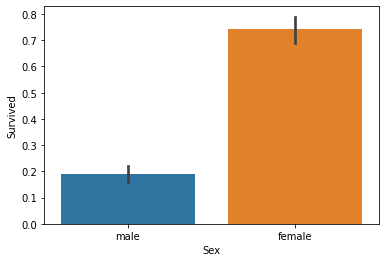

In [49]:
sns.barplot(data=train_data, x='Sex', y='Survived')

### PClass

In [50]:
# Percentage of Pclass - 1 in the Train DataFrame who survived
Pclass1 = train_data.loc[train_data.Pclass == 1]["Survived"]
rate_Pclass1 = sum(Pclass1)/len(Pclass1)

print("% of Pclass - 1 who survived:", rate_Pclass1 * 100)

% of Pclass - 1 who survived: 62.96296296296296


In [51]:
# Percentage of Pclass - 2 in the Train DataFrame who survived
Pclass2 = train_data.loc[train_data.Pclass == 2]["Survived"]
rate_Pclass2 = sum(Pclass2)/len(Pclass2)

print("% of Pclass - 2 who survived:", rate_Pclass2 * 100)

% of Pclass - 2 who survived: 47.28260869565217


In [52]:
# Percentage of Pclass - 3 in the Train DataFrame who survived
Pclass3 = train_data.loc[train_data.Pclass == 3]["Survived"]
rate_Pclass3 = sum(Pclass3)/len(Pclass3)

print("% of Pclass - 3 who survived:", rate_Pclass3 * 100)

% of Pclass - 3 who survived: 24.236252545824847


<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

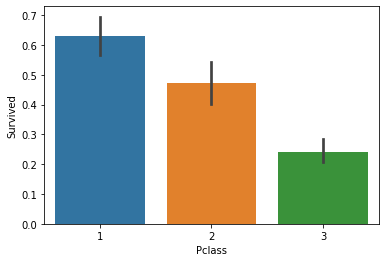

In [53]:
sns.barplot(data=train_data, x='Pclass', y='Survived')

In [54]:
# Filling Null Values in 'Age' Column with -0.5

train_data['Age'] = train_data['Age'].fillna(-0.5)
test_data['Age'] = test_data['Age'].fillna(-0.5)


bins = [-1, 0, 5, 12, 18, 24, 35, 60, np.inf]

labels = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Senior']

train_data['AgeGroup'] = pd.cut(train_data['Age'], bins, labels=labels)
test_data['AgeGroup'] = pd.cut(test_data['Age'], bins, labels=labels)

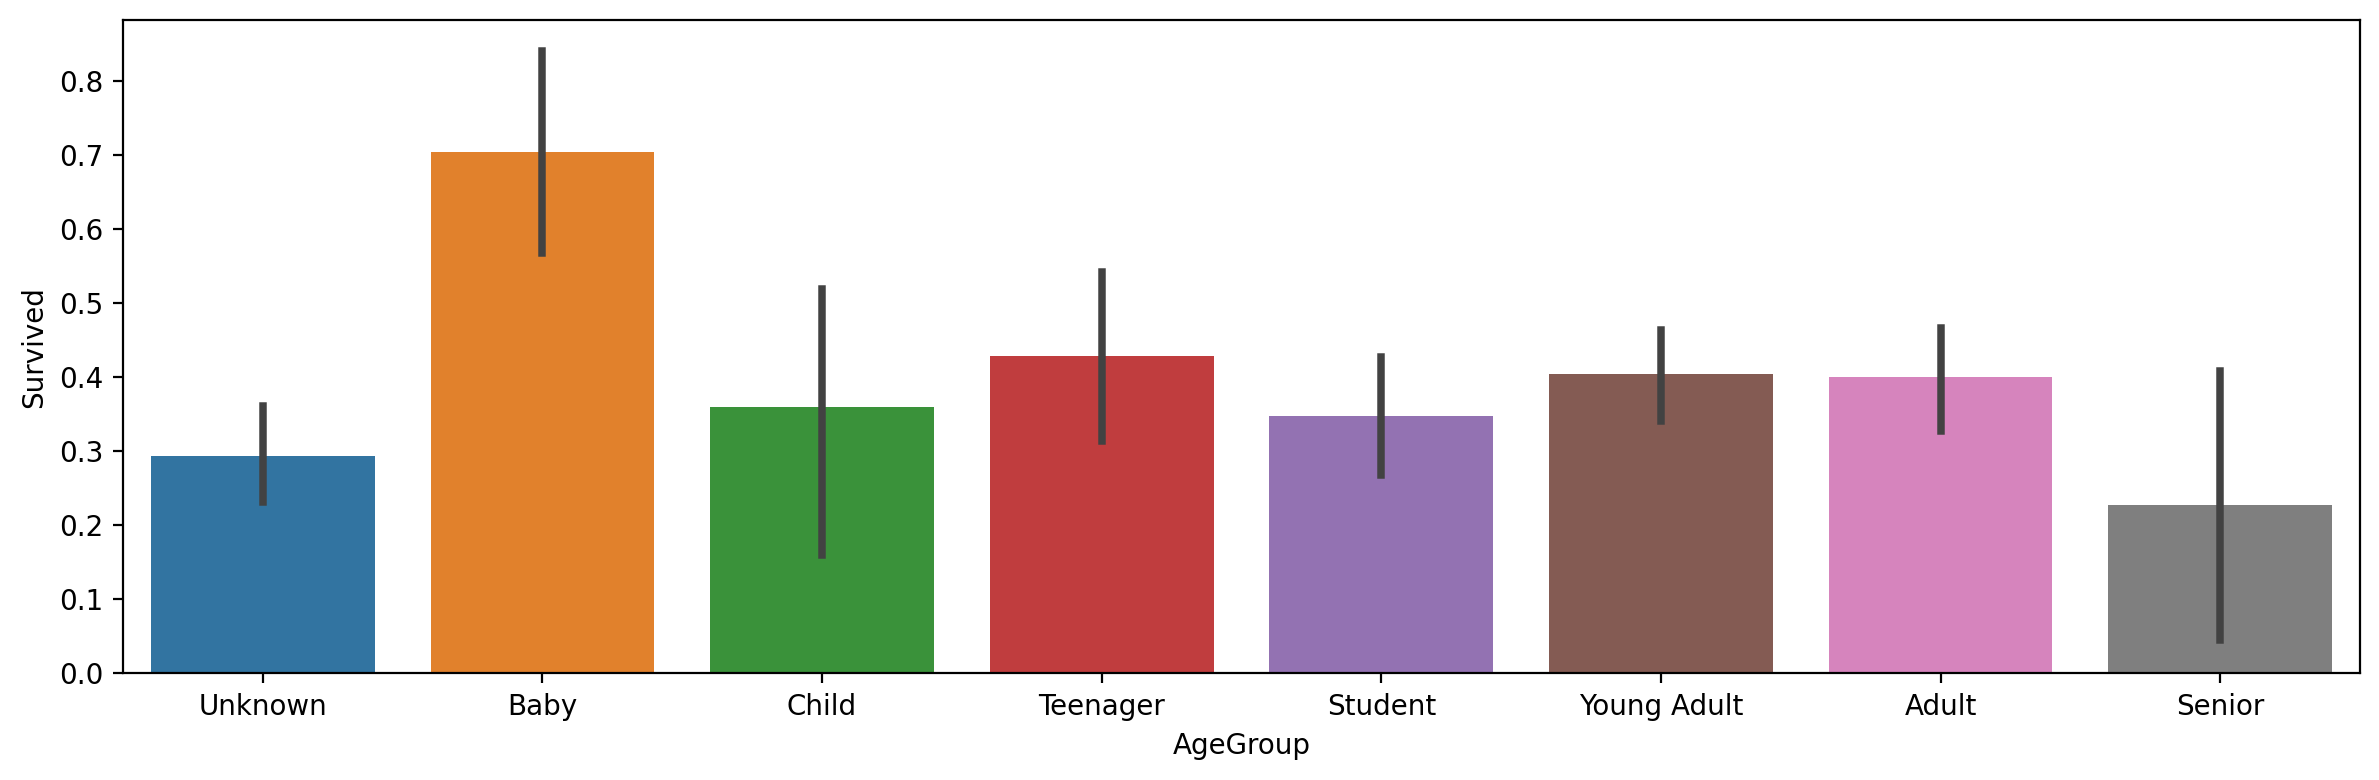

In [55]:
plt.figure(figsize=(12,4),dpi=200)
sns.barplot(x='AgeGroup', y='Survived', data=train_data)
plt.tight_layout()
plt.show();

In [56]:
train_data = train_data.drop(['Ticket', 'Cabin', 'Fare'],axis=1)
test_data = test_data.drop(['Ticket', 'Cabin', 'Fare'], axis=1)

## Dealing with Missing Values

In [57]:
print('Number of people embarking in Southampton (S): ')
southampton = train_data[train_data['Embarked']=='S'].shape[0]
print(southampton)

print('Number of people embarking in Cherbourg (C): ')
cherbourg = train_data[train_data['Embarked']=='C'].shape[0]
print(cherbourg)

print('Number of people embarking in Queenstown (Q): ')
queenstown = train_data[train_data['Embarked']=='Q'].shape[0]
print(queenstown)

Number of people embarking in Southampton (S): 
644
Number of people embarking in Cherbourg (C): 
168
Number of people embarking in Queenstown (Q): 
77


In [58]:
train_data['Embarked'] = train_data['Embarked'].fillna('S')

In [59]:
train_data.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Embarked       0
AgeGroup       0
dtype: int64

In [60]:
combine = [train_data, test_data]

for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
    
pd.crosstab(train_data['Title'], train_data['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [61]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Capt', 'Col', 'Don', 'Dr', 'Major','Rev','Jonkheer','Dona'], 'Rare')

In [62]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Countess', 'Lady', 'Sir'], 'Royal')

In [63]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Mlle', 'Ms'], 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

In [64]:
train_data[['Title','Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.285714
5,Royal,1.000000


In [65]:
title_mapping = {'Mr':1, 'Miss':2, 'Mrs':3, 'Master':4, 'Royal':5, 'Rare':6}

for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

In [66]:
mr_age = train_data[train_data['Title']==1]['AgeGroup'].mode()
miss_age =  train_data[train_data['Title']==2]['AgeGroup'].mode()
mrs_age = train_data[train_data['Title']==3]['AgeGroup'].mode()
master_age = train_data[train_data['Title']==4]['AgeGroup'].mode()
royal_age = train_data[train_data['Title']==5]['AgeGroup'].mode()
rare_age = train_data[train_data['Title']==6]['AgeGroup'].mode()

In [67]:
age_title_map = {1:'Young Adult', 2:'Student', 3:'Adult', 4:'Baby', 5:'Adult', 6:'Adult'}

for i in range(len(train_data['AgeGroup'])):
    if train_data['AgeGroup'][i]  == 'Unknown':
        train_data['AgeGroup'][i] = age_title_map[train_data['Title'][i]]
        
for i in range(len(test_data['AgeGroup'])):
    if test_data['AgeGroup'][i]  == 'Unknown':
        test_data['AgeGroup'][i] = age_title_map[test_data['Title'][i]]

In [68]:
train_data.AgeGroup.unique()

['Student', 'Adult', 'Young Adult', 'Baby', 'Teenager', 'Child', 'Senior']
Categories (8, object): ['Unknown' < 'Baby' < 'Child' < 'Teenager' < 'Student' < 'Young Adult' < 'Adult' < 'Senior']

In [69]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

transform = ['Sex', 'AgeGroup', 'Embarked']

for i in transform:
    train_data[i] = le.fit_transform(train_data[i])

In [70]:
for i in transform:
    test_data[i] = le.fit_transform(test_data[i])

## Machine Learning

In [71]:
X_train = train_data.drop(['PassengerId', 'Name', 'Survived'], axis=1)
y_train = train_data['Survived']
X_test = test_data.drop(['PassengerId','Name'], axis=1)

In [72]:
from sklearn.linear_model import LogisticRegression

In [73]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

test_predictions = lr.predict(X_test)

In [74]:
ids = test_data['PassengerId']
output = pd.DataFrame({'PassengerId':ids, 'Survived':test_predictions})
output.to_csv('submission.csv', index=False)